# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

<h1>1. Project Scoping Introduction and Background</h1>
<h3> Team: </h3> Mike Andersen, ma3775@drexel.edu
<h3> Proposed Project Title: </h3> Analysis and Interpretation of Ornithological Citizen Science Survey of Grassland Species Bird Data Merged With Agricultural Census Data

<h4> 1.1 Team Background: </h4> 
I graduated with a B.Sc in Biochemistry & Molecular Biology from Penn State in 2016, where I worked as an undergraduate researcher in computational chemistry and microbiology. After graduating, I worked as a molecular and cell biology scientist for four years at a contract research organization and then started working as an associate scientist at Johnson and Johnson. After two years, I transitioned into an IT/Business Analyst role supporting drug discovery and development activities. I am now taking my final class of the Applied Data Science post-bacc program at Drexel. Outside of work, I find enjoyment in bird watching and nature photography, and have a strong interest in using programming an data science to study trends in bird observations and population. 

In between classes at Drexel, I recently completed the Data Engineering nanodegree offerred by Udacity. In this program, I strengthed my skills in SQL, cloud computing, and python programming. Additional skills acquired through self-teaching, on-the-job training, or through coursework at Drexel include statistical reasoning, biostatistics, data visualization, exploratory data analysis, data pipeline/ETL development, and business analysis. 

<h4> 1.2 Project Proposal Background </h4>
For this project, I would like to proceed with a continuation of a data engineering project I completed as part of the Udacity nanodegree. The objective of my previous work was to construct a finalized dataset by merging data from a 2017 USDA Agricultural Survey with bird observation data acquired from the Cornell Lab of Ornithology eBird program. The intent of the initial data engineering effort was to construct a dataset that would include logged observations of bird sightings for a select subset of species which are considered dependent on grassland ecosystems, and combine the data with a subset of relevant features from the USDA agricultural census. The resulting dataset was comprised of four separate tables in a star schema, as shown in the cell below.

The high-level intention of the dataset was to provide a starting point for analytics efforts focused on understanding the relationship between various agricultural features/practices and populations of grassland-dependent bird species. For example, questions along the veins of the following could be investigated using the dataset:
- Are certain species observed more frequently in regions with dense areas of pastureland, cropland, or irrigated land?
- What are the population densities of grassland-dependent bird species in regions with higher usage of chemicals to control insects, growth, or disease?
- Do regions with more acres enrolled in conservation efforts have more dense populations of grassland-dependent species?
- Are there species of grassland-dependent bird which tend to associate more heavily with farmland treated with animal manure?

The grassland-dependent bird species included in the dataset include some species which are critically threatened or endangered, so conservation efforts are of the highest concern. The hope is that by leveraging the prepared dataset for more advanced analytics techniques, trends in population and impact of agricultural features or practices could come to light. Ecological researchers, agriculatural practitioners, policy-makers, and citizen scientists are all potential end-users or consumers of the analyses which come to fruition from this project.

The GitHub repository for the dataset construction can be found here: https://github.com/salamandersen93/udacity_capstone_farmland_avian_dataset

An attempt at visualizing the numerical variables in the constructed dataset was performed using Tableau as a project for INFO633 (Information Visualization, Drexel University). This analysis did not include any statistical analysis, mathematical manipulation of the data, or algorithmic approaches at analyzing the data. The nature of the visualization was purely exploratory in nature, and did not quantify or characterize any trends using analytics techniques. The dashboard constructed can be found here: https://public.tableau.com/app/profile/mike.andersen5299/viz/farmland_avian_v3_May2022/Dashboard1. My hope is to apply the advanced analytics topics covered in DSCI521 (data transformation, probability, regression, classification, and neural networks) to build upon the visual exploration of the dataset and bring the full potential of the dataset into fruition.

A detailed analysis of next steps, a synopsis of the exploratory data analysis results, and limitations of the data can be found in section 5 of this report.

<h4> 1.3 Data Model: </h4> Note that the 'farm_variable_dimension' table contains fields which are encoded with names from the source USDA agricultural survey. A dictionary is provided subsequently which describes the fields in detail.

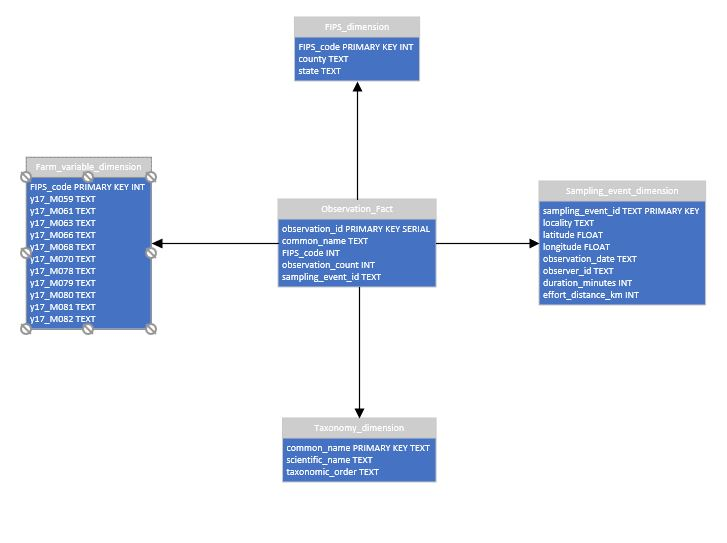

<h4> Data Dictionary for 'farm_variable_dimension' </h4>
FIPS_code: FIPS code (geographic information data) <br>
y17_M059: Acres of Land in Farms as Percent of Land Area in Acres: 2017 <br>
y17_M061: Acres of Irrigated Land as Percent of Land in Farms Acreage: 2017 <br>
y17_M063: Acres of Total Cropland as Percent of Land Area in Acres: 2017 <br>
y17_M066: Acres of Harvested Cropland as Percent of Land in Farms Acreage: 2017 <br>
y17_M068: Acres of All Types of Pastureland as Percent of Land in Farms Acreage: 2017 <br>
y17_M070: Acres Enrolled in the Conservation Reserve, Wetlands Reserve, Farmable Wetlands, or Conservation Reserve Enhancement Programs as Percent of Land in Farms Acreage: 2017 <br>
y17_M078: Acres of Cropland and Pastureland Treated with Animal Manure as Percent of Total Cropland Acreage: 2017 <br>
y17_M079: Acres Treated with Chemicals to Control Insects as Percent of Total Cropland Acreage: 2017 <br>
y17_M080: Acres Treated with Chemicals to Control Nematodes as Percent of Total Cropland Acreage: 2017 <br>
y17_M081: Acres of Crops Treated with Chemicals to Control Weeds, Grass, or Brush as Percent of Total Cropland Acreage: 2017 <br>
y17_M082: Acres of Crops Treated with Chemicals to Control Growth, Thin Fruit, Ripen, or Defoliate as Percent of Total Cropland Acreage: 2017 <br>
y17_M083: Acres Treated with Chemicals to Control Disease in Crops and Orchards as Percent of Total Cropland Acreage: 2017 <br>

<h1> 2. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# FIPS table is geographic information context table
fips_df = pd.read_csv('project_data/FIPS_dim.csv')
# NASS table is a cleaned and preprocessed subset of the USDA agricultural census data
nass_df = pd.read_csv('project_data/NASS_dim.csv')
# observation table is a cleaned and preprocessed table of bird observation data (raw data sourced from eBird)
bird_df = pd.read_csv('project_data/observation_fact_table.txt')

<h2> 2.1 Structural Summaries, Dataset Descriptions </h2>
Defining functions for basic exploration of dataframe structure and content to inform downstream analyses.

In [2]:
# basic structure of dataframe
def df_structure (df, dfname):
    print('Structural Features of:', dfname, '\n')
    print('Data shape:\n' + 'rows:', df.shape[0], '\ncols:', df.shape[1], '\n')
    print('Data types:\n' + str(df.dtypes), '\n')
    print('Unique values per column:\n' + str(df.nunique()))
    print('\nNumber of NA values per column:\n' + str(df.isna().sum()))
    print('-------------------------------------')

# more in-depth characteristics of the object-type columns of a dataframe
def non_numeric_structure (df, dfname):
    print('Non-numeric Features of:', dfname, '\n')
    try:
        non_num_df = df.select_dtypes(exclude="number")
        non_num_df_f10 = non_num_df.iloc[:10]
        print('Dataframe sample:\n', non_num_df_f10, '\n')
        #print('Unique Values:', df.apply(lambda x: x.unique()))
        print('Unique Values:')
        for i in non_num_df:
            print(i + ':', non_num_df[i].unique())
        print('\n Description of non-numeric features:')
        print(non_num_df.describe())
    except:
        print('no non-numeric values present in df.')
    print('-------------------------------------')
    
# more in-depth characteristics of the numeric-type columns of a dataframe
def numeric_structure (df, dfname):
    print('Numeric Features of:', dfname, '\n')
    try:
        num_df = df.select_dtypes(exclude="object")
        num_df_f10 = num_df.iloc[:10]
        print('Dataframe sample:\n', num_df_f10, '\n')
        print('Statistical Summary:\n' + str(num_df.describe()), '\n')
        print('Unique value counts:\n' + str(num_df.nunique()), '\n')
        print('-------------------------------------')
    except:
        print('no numeric values present in df')

<h3> 2.1.1 Basic data features and high level summaries: </h3>

The code below is an exploration of basic high-level dataframe characteristics like shape, data types, and missing values.

In summary:

<b>FIPS:</b>
The FIPS dataset contains 3079 rows and 4 columns. FIPSTEXT is the integer value of the FIPS code, CountyName describes the geographical region, entity describes the nature of the region (whether it is a county, city, parish, etc.), and StateName describes the state for which the CountyName belongs to. This is a geographical hierarchy. 

There are 3079 unique values for FIPSTEXT, 1787 unique values in CountyName, 4 unique entity categories, and 50 unique states. An obvious but interesting point here is that there are 1787 unique values for CountyName, so it is clear that there are duplicate names within the dataset for this field. When analyzing, it will be important to use FIPSTEXT when aggregating or grouping data to perform statistical analyses. An important note that there are only 3006 counties in the US, so the remaining rows are actually represented by NASS as survey regions, parishes, or cities, and are not actual counties.

<b>NASS agricultural survey data:</b>
The NASS data is comprised of 3080 rows and 13 columns. Each of the 3080 rows is associated with a unique survey area, region, parish, city, or county. The FIPS field associates the data with the bird observation table and the FIPS table. The remaining 12 columns are metrics pertaining to agricultural practices or geographic land features related to agricultural land. These are described in more detail previously in the write-up, and more descriptive names are assigned later in this analysis. 

An important note that this is the only dataset with null values. Null values will be approached later in this analysis using a linear regression approach for interpolation of missing data.

<b>Bird Observation data table:</b>
This dataset is comprised of 5 columns and 3,398,213 rows. This is a fact table constructed with each row constituting a unique observation from eBird. Observations are associated with sampling event IDs, which can be thought of as a birdwatching event at a given location on a given datetime (e.g., a trip to a birding hotspot Stone Harbor Point on July 2nd 2021 from 8AM-10AM). An observation, is a count/comments entry about a specific species during that sampling event. 

The table contains the common name of the observed species, the observation count, the FIPS code (to link to the dimension tables), a sampling event identifier, and observation id (unique ID). Note that only 3003 unique FIPS codes exist in this dataset. This is likely because not every county/area has birdwatchers logging events on eBird. 

In [3]:
'''Using the defined 'df_structure' function to give features like dataframe shape, data types for each column,
number of unique values per column, and number of missing values per column... repeat for all 3 dataframes.'''
df_structure(fips_df, 'FIPS')
df_structure(nass_df, 'NASS')
df_structure(bird_df, 'bird observations')

Structural Features of: FIPS 

Data shape:
rows: 3079 
cols: 4 

Data types:
FIPSTEXT       int64
CountyName    object
Entity        object
StateName     object
dtype: object 

Unique values per column:
FIPSTEXT      3079
CountyName    1787
Entity           4
StateName       50
dtype: int64

Number of NA values per column:
FIPSTEXT      0
CountyName    0
Entity        0
StateName     0
dtype: int64
-------------------------------------
Structural Features of: NASS 

Data shape:
rows: 3080 
cols: 13 

Data types:
FIPS                       int64
y17_M059_valueNumeric    float64
y17_M061_valueNumeric    float64
y17_M063_valueNumeric    float64
y17_M066_valueNumeric    float64
y17_M068_valueNumeric    float64
y17_M070_valueNumeric    float64
y17_M078_valueNumeric    float64
y17_M079_valueNumeric    float64
y17_M080_valueNumeric    float64
y17_M081_valueNumeric    float64
y17_M082_valueNumeric    float64
y17_M083_valueNumeric    float64
dtype: object 

Unique values per column:
FIPS       

<h3> 2.1.2 Summarizing and describing non-numeric columns: </h3>

The following cells are an exploration of each dataframe's non-numeric columns and categorical-type features. Dataframe shape, lists of unique values for each column, counts of values in each column, number of unique values in each column, and frequencies are examined for each dataframe.

<b>FIPS:</b>
The Pandas describe functionality brings to light that the top county name is 'Washington', the top entity type is 'county', and the top state name is Texas (with 254 counties/areas).

<b>Nass agricultural survey data:</b>
There are no non-numeric fields in this table.

<b>Bird observation dataset:</b>
The pandas describe functionality shows the following:
- There are 17 unique species. The top species is red-winged blackbird with 924941 occurrences.
- There are 1958132 unique sampling event identifiers (total count of 3398213). Thus, many of the individual observations are associated with the same sampling event. 
- There is also an issue that observation count is an object column, thought it is numeric in nature. This is addressed further in the analysis by identifying the non-numeric values, converting them to null, and interpolating null values.

In [4]:
'''Using the non_numeric_structure to drill down into more specific structural features of the object data types.
This analysis outputs a sample of the columns, all unique values from each column, counts, nunique, and frequencies.'''

non_numeric_structure(fips_df, 'FIPS')
non_numeric_structure(nass_df, 'NASS')
non_numeric_structure(bird_df, 'bird observations')

Non-numeric Features of: FIPS 

Dataframe sample:
   CountyName  Entity StateName
0    Autauga  County   Alabama
1    Baldwin  County   Alabama
2    Barbour  County   Alabama
3       Bibb  County   Alabama
4     Blount  County   Alabama
5    Bullock  County   Alabama
6     Butler  County   Alabama
7    Calhoun  County   Alabama
8   Chambers  County   Alabama
9   Cherokee  County   Alabama 

Unique Values:
CountyName: ['Autauga' 'Baldwin' 'Barbour' ... 'Uinta' 'Washakie' 'Weston']
Entity: ['County' 'Agricultural Census Area' 'Parish' 'City']
StateName: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Is

<h3> 2.1.3 Data Cleaning and Corrections Required For Non-numeric Columns: </h3>
1. Finding non-numeric values in the observation_count field of the bird observation table. These will be replaced in the next few cells using linear regression interpolation.<br>
2. Converting the sampling_event ID from the bird observation dataset to numeric from string.<br>
3. Enriching the bird observation dataset with a categorical field for common_name.<br>
4. Updating the names from the NASS dataset to more meaningful values.<br>

In [5]:
# finding non-numeric values
def find_non_numeric (df, col):
    try:
        non_nums = df[df[col].apply(lambda x: not x.isnumeric())]
        val = list(non_nums[col].unique())
    except:
        val = 'all columns are numeric'
    return val

# listing all of the non-numeric values so they can be replaced (in the following cell)
list_of_non_nums_birds = find_non_numeric(bird_df, 'observation_count')
print(list_of_non_nums_birds) # the output is 'X' for observation count

'''Enriching the dataset with a category column type for the common_name field from the bird observation table.'''
bird_df['common_name'] = bird_df['common_name'].astype('category')
bird_df['common_name_code'] = bird_df['common_name'].cat.codes
common_name_code_reference_df = bird_df[['common_name', 'common_name_code']].drop_duplicates()

'''Enriching the NASS dataset with more meaningful names for columns.'''
nass_rename = {'y17_M059_valueNumeric': 'land_in_farms',
        'y17_M061_valueNumeric': 'irrigated_land_in_farms',
        'y17_M063_valueNumeric': 'cropland_in_land_area',
        'y17_M066_valueNumeric': 'harvested_cropland_in_farms',
        'y17_M068_valueNumeric': 'pastureland_in_farms',
        'y17_M070_valueNumeric': 'farmland_in_convservation_program',
        'y17_M078_valueNumeric': 'cropland_and_pastureland_treated_with_animal_manure',
        'y17_M079_valueNumeric': 'cropland_treated_to_control_insects',
        'y17_M080_valueNumeric': 'cropland_treated_to_control_nematodes',
        'y17_M081_valueNumeric': 'cropland_treated_to_control_weeds',
        'y17_M082_valueNumeric': 'cropland_treated_to_control_growth',
        'y17_M083_valueNumeric': 'cropland_treated_to_control_disease'}

nass_df.rename(columns=nass_rename,
          inplace=True)

nass_df.head()

['X']


,FIPS,land_in_farms,irrigated_land_in_farms,cropland_in_land_area,harvested_cropland_in_farms,pastureland_in_farms,farmland_in_convservation_program,cropland_and_pastureland_treated_with_animal_manure,cropland_treated_to_control_insects,cropland_treated_to_control_nematodes,cropland_treated_to_control_weeds,cropland_treated_to_control_growth,cropland_treated_to_control_disease
0,0,39.8,6.44,17.54,35.55,48.94,2.55,6.03,28.36,3.70,73.91,3.72,11.17
1,1001,29.8,1.25,9.70,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.90,0.90
2,1003,17.2,4.25,10.85,53.95,19.51,1.83,5.48,70.25,15.83,78.42,10.64,54.45
3,1005,27.0,2.36,6.59,16.52,30.00,7.43,28.16,27.11,1.36,63.91,7.19,NaN
4,1007,14.0,0.14,3.97,19.32,29.43,0.76,4.64,NaN,0.00,55.13,0.00,NaN


<h4> Below is a function to replace non-numeric values with imputed (linear regression) values in bird observations</h4>

In [6]:
def replace_non_numeric(df_in, col, lst):
    df = df_in.copy()
    # replacing non-numeric values with np.nan
    for i in lst:
        df[col] = df[col].replace(i, np.nan)
    # converting target column to numeric after replacing non-numeric values
    df[col] = pd.to_numeric(df[col])
    
    df[col] = df[col].interpolate(method='linear')
    return df
    
cleaned_bird_df = replace_non_numeric(bird_df, 'observation_count', list_of_non_nums_birds)
print(cleaned_bird_df.isna().sum())

cleaned_bird_df = cleaned_bird_df.merge(common_name_code_reference_df)
print(cleaned_bird_df.shape) # checking logic to make sure the shape matches original

cleaned_bird_df.head()

observation_id       0
common_name          0
fips_code            0
observation_count    0
sampling_event_id    0
common_name_code     0
dtype: int64
(3398213, 6)


,observation_id,common_name,fips_code,observation_count,sampling_event_id,common_name_code
0,7,Northern Bobwhite,1001,1.0,S38202933,10
1,23,Northern Bobwhite,1003,1.0,S36296801,10
2,39,Northern Bobwhite,1003,1.0,S36789045,10
3,55,Northern Bobwhite,1003,1.0,S37564606,10
4,71,Northern Bobwhite,1003,4.0,S40516422,10


<h3> 2.1.4 Summarizing and describing numeric columns: </h3>

In summary:

<b>FIPS:</b>
The only numerical field in the FIPS dataset is the FIPSTEXT column, which contains the FIPS codes. 

<b>NASS agricultural survey data:</b>
Count, mean, std, min, 25%, 50%, 75%, and max were calculated using pandas for all columns. Each of the values is a percentage value with the exception of FIPS. Visualizations will be constructed later (histograms, box-and-whisker plots) to understand the story of the data more easily.

<b>Bird observation dataset:</b>
The same calculations as above were executed on this dataset. The most critical numeric field to pay attention to in this table is the observation count. This will be visualized using histogram/box-and-whisker plot downstream as well.

In [7]:
# using the 'numeric_sturcture' defined above to assess all numeric columns from each dataframe.
numeric_structure(fips_df, 'FIPS')
numeric_structure(nass_df, 'NASS')
numeric_structure(cleaned_bird_df, 'bird observations')

Numeric Features of: FIPS 

Dataframe sample:
    FIPSTEXT
0      1001
1      1003
2      1005
3      1007
4      1009
5      1011
6      1013
7      1015
8      1017
9      1019 

Statistical Summary:
           FIPSTEXT
count   3079.000000
mean   30375.060409
std    14934.319648
min     1001.000000
25%    19014.000000
50%    29167.000000
75%    45042.000000
max    56045.000000 

Unique value counts:
FIPSTEXT    3079
dtype: int64 

-------------------------------------
Numeric Features of: NASS 

Dataframe sample:
    FIPS  land_in_farms  irrigated_land_in_farms  cropland_in_land_area  \
0     0           39.8                     6.44                  17.54   
1  1001           29.8                     1.25                   9.70   
2  1003           17.2                     4.25                  10.85   
3  1005           27.0                     2.36                   6.59   
4  1007           14.0                     0.14                   3.97   
5  1009           35.9            

<h1> 3. Data Quality Checks </h1>
Before moving into the data visualization portion of EDA, it is critical to perform the following quality checks:<br><br>
1. Checking for duplicate rows (true duplicates, across all columns)<br>
2. Checking for missing values<br>
3. Calculating percent null per column, total nulls using the detect_missing function<br>
4. Address outliers<br>

In [8]:
def detect_duplicates(df, dfname):
    print('Duplicate row report for:', dfname)
    dups = df[df.duplicated()]
    if len(dups) < 1:
        print('no duplicate rows')
    else:
        print(dups)
    print('-------------------------------------')
    
def detect_missing(df, dfname):
    plt.figure(figsize=(10, 8))
    plt.imshow(df.isna(), aspect='auto', interpolation='nearest', cmap='gnuplot')
    plt.xlabel('Column')
    plt.ylabel('Row')

def report_missing(df, dfname):
    print('Missing value report for:', dfname)
    print('percent nulls:')
    print(df.isnull().sum()/len(df)*100, '\n')
    print('null counts:')
    print(df.isna().sum(), '\n')
    print('-------------------------------------')

Duplicate row report for: FIPS
no duplicate rows
-------------------------------------
Duplicate row report for: NASS
no duplicate rows
-------------------------------------
Duplicate row report for: birds
no duplicate rows
-------------------------------------


Missing value report for: FIPS
percent nulls:
FIPSTEXT      0.0
CountyName    0.0
Entity        0.0
StateName     0.0
dtype: float64 

null counts:
FIPSTEXT      0
CountyName    0
Entity        0
StateName     0
dtype: int64 

-------------------------------------
Missing value report for: NASS
percent nulls:
FIPS                                                    0.000000
land_in_farms                                           0.422078
irrigated_land_in_farms                                 7.500000
cropland_in_land_area                                   0.389610
harvested_cropland_in_farms                             2.532468
pastureland_in_farms                                    1.071429
farmland_in_convservation_program  

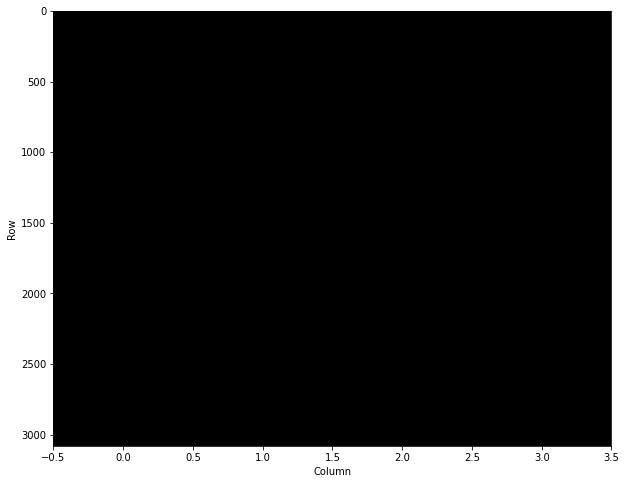

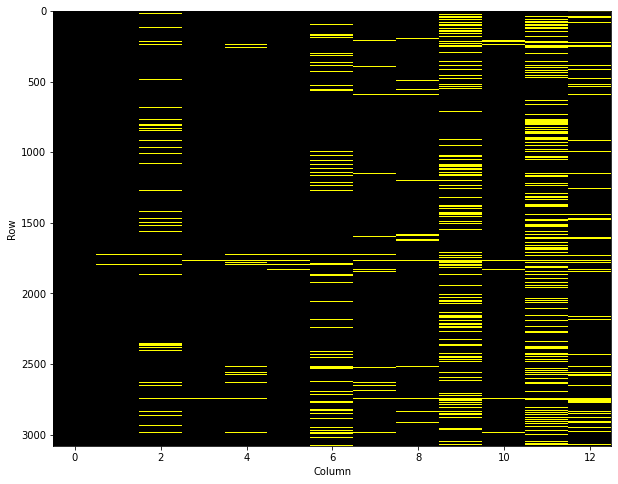

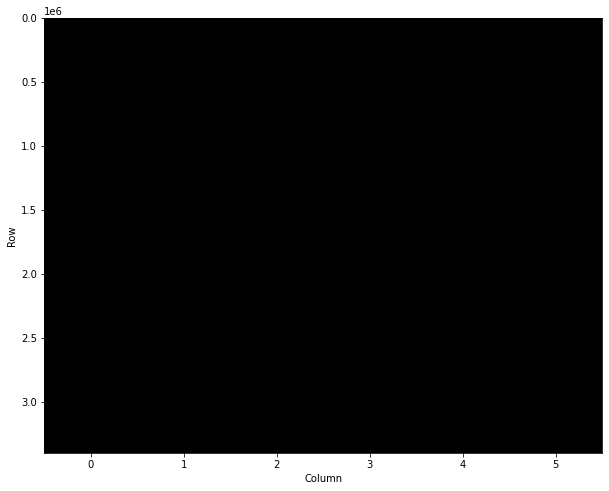

In [9]:
detect_duplicates(fips_df, 'FIPS')
detect_duplicates(nass_df, 'NASS')
detect_duplicates(cleaned_bird_df, 'birds')
print('\n')

report_missing(fips_df, 'FIPS')
report_missing(nass_df, 'NASS')
report_missing(cleaned_bird_df, 'birds')
print('\n')

print('null plots')
detect_missing(fips_df, 'FIPS')
detect_missing(nass_df, 'NASS')
detect_missing(cleaned_bird_df, 'birds')

<h2>3.1 Summary of Data Quality Check Results:</h2>

No duplicate rows were detected in any of the three tables.

Missing values were only identified in the NASS dataset. A linear regression approach was used to fill in the missing values for all 12 columns where missing values were identified.

<h3>3.1.1 Interpolating Missing Data in NASS </h3>

In [10]:
# filling missing values in NASS dataset with similar function used to treat non-nulls and nulls previously with bird df
nulls_to_fill = ['FIPS', 'land_in_farms', 'irrigated_land_in_farms', 'cropland_in_land_area', 'harvested_cropland_in_farms',
'pastureland_in_farms', 'farmland_in_convservation_program', 'cropland_and_pastureland_treated_with_animal_manure', 
'cropland_treated_to_control_insects', 'cropland_treated_to_control_nematodes', 'cropland_treated_to_control_weeds',
'cropland_treated_to_control_growth', 'cropland_treated_to_control_disease']

def interpolator (df, lst):
    temp_df = df[0:0] # empty copy
    for i in range(len(lst)):
        if i == 0:
            temp_df[lst[i]] = df[lst[i]].interpolate(method='linear')
            out_df = temp_df
        else:
            temp_df[lst[i]] = df[lst[i]].interpolate(method='linear')
            out_df.append(temp_df)
    
    return out_df
        
cleaned_nass_df = interpolator(nass_df, nulls_to_fill)
print(cleaned_nass_df.isna().sum()) # check to ensure all nulls resolved
cleaned_nass_df.head()

FIPS                                                   0
land_in_farms                                          0
irrigated_land_in_farms                                0
cropland_in_land_area                                  0
harvested_cropland_in_farms                            0
pastureland_in_farms                                   0
farmland_in_convservation_program                      0
cropland_and_pastureland_treated_with_animal_manure    0
cropland_treated_to_control_insects                    0
cropland_treated_to_control_nematodes                  0
cropland_treated_to_control_weeds                      0
cropland_treated_to_control_growth                     0
cropland_treated_to_control_disease                    0
dtype: int64


,FIPS,land_in_farms,irrigated_land_in_farms,cropland_in_land_area,harvested_cropland_in_farms,pastureland_in_farms,farmland_in_convservation_program,cropland_and_pastureland_treated_with_animal_manure,cropland_treated_to_control_insects,cropland_treated_to_control_nematodes,cropland_treated_to_control_weeds,cropland_treated_to_control_growth,cropland_treated_to_control_disease
0,0,39.8,6.44,17.54,35.55,48.94,2.55,6.03,28.36,3.70,73.91,3.72,11.170000
1,1001,29.8,1.25,9.70,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.90,0.900000
2,1003,17.2,4.25,10.85,53.95,19.51,1.83,5.48,70.25,15.83,78.42,10.64,54.450000
3,1005,27.0,2.36,6.59,16.52,30.00,7.43,28.16,27.11,1.36,63.91,7.19,36.693333
4,1007,14.0,0.14,3.97,19.32,29.43,0.76,4.64,22.78,0.00,55.13,0.00,18.936667


<h2> 3.2 Outlier Detection </h2>

<h3> 3.2.1 Using z-score of 3 to detect outliers in dataframe </h3>

Outliers in the bird observation table will be especially challenging to deal with due to the fact that, occassionaly, very large flocks of birds are observed. These flocks can occur in the hundreds of thousands or millions. Reporting of large flocks is critical to understanding population dynamics, dispersion, and migration (https://www.columbia-audubon.org/birds-in-big-numbers-flocks-of-blackbirds-and-starlings/), thus the data points are informative and should not be recklessly deleted. With that said, data entry errors cannot be ruled out. Fortunately, when downloading datasets from eBird the user is given the option to select to only downloaded expert-vetted data. While this decreases sample size, it improves the quality of data and helps to rule out the possibility of data entry errors by novice birdwatchers and typos. Since this option was selected and the flocks are a natural component of the population in study, the observation count outliers will not be removed but will still be studied in the below code.

Note about the bird observation outliers: these outliers all make scientific sense. Lapland longspur are known to form flocks of over 4 million birds (https://www.allaboutbirds.org/guide/Lapland_Longspur/overview), and Red-winged blackbirds are known to form flocks in even larger numbers (https://www.columbia-audubon.org/birds-in-big-numbers-flocks-of-blackbirds-and-starlings/). The other species with outlier data is horned lark. These birds are known to form large nomadic flocks in winter, so these large numbers are scientifically sound (https://www.allaboutbirds.org/guide/Horned_Lark/lifehistory).

Note about the NASS observation outliers: these outliers existed in the raw dataset. The values of the dataset are percentages,  (e.g. percentage of land in farms as a percentage of total land, ...), so values above 100% typically would raise a red flag. The justification for the abnormalities is included in the USDA report: https://www.nass.usda.gov/Publications/AgCensus/2017/Full_Report/Volume_1,_Chapter_1_US/usappxb.pdf. In essence, if two or more different crops were treated, then the area of cropland treated (animal manure, chemicals, etc.) may exceed 100%.

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def outlier_detection (df, col, z): 
    outliers = df[np.abs(df[col]-df[col].mean()) >= (z*df[col].std())].sort_values(by=col, ascending=False)
    print(outliers.shape)
    return outliers

bird_df_outliers = outlier_detection(cleaned_bird_df, 'observation_count', 3)
bird_df_outliers

(223, 6)


,observation_id,common_name,fips_code,observation_count,sampling_event_id,common_name_code
1739063,1740733,Red-winged Blackbird,13063,5.000000e+06,S33543599,11
703299,703460,Lapland Longspur,8063,1.250000e+06,S33734360,8
707919,703521,Lapland Longspur,8063,1.250000e+06,S33734390,8
1559396,1439851,Red-winged Blackbird,42029,1.200000e+06,S33922351,11
2274266,2293562,Red-winged Blackbird,42029,1.200000e+06,S33963633,11
1953610,2025408,Red-winged Blackbird,29087,1.080000e+06,S41227545,11
2035098,2056837,Red-winged Blackbird,20009,1.000000e+06,S40602145,11
1491573,1608496,Red-winged Blackbird,20009,1.000000e+06,S35212224,11
1634859,1681114,Red-winged Blackbird,20009,1.000000e+06,S35222070,11
2305090,2271563,Red-winged Blackbird,20009,1.000000e+06,S35211962,11


In [12]:
# writing all to new files for futher analysis...
cleaned_bird_df.to_csv('cleaned_data/cleaned_observation_data.csv')
cleaned_nass_df.to_csv('cleaned_data/cleaned_nass_data.csv')

<h1> 4. Data Correlation Matrices and Visual Analysis </h1>

Now that the tables have been examined and prepared for further exploratory analysis, the next step will be to construct correlation matrices to fully understand the relationships between variables. I will use Pandas SQL to construct views from the dataframes since I am working with three independent dataframes (one fact table and two dimensions).

In [13]:
import pandasql as ps
pysqldf = lambda q: sqldf(q, globals())

# creating a view of the joined relationship of all three tables 
q = """
    SELECT cleaned_nass_df.*, cleaned_bird_df.*, fips_df.*
        FROM
            cleaned_nass_df
        JOIN
            cleaned_bird_df
        ON 
            cleaned_nass_df.FIPS = cleaned_bird_df.fips_code
        JOIN
            fips_df
        ON 
            cleaned_nass_df.FIPS = fips_df.FIPSTEXT
    """
merge_df = pysqldf(q)
merge_df.head()

,FIPS,land_in_farms,irrigated_land_in_farms,cropland_in_land_area,harvested_cropland_in_farms,pastureland_in_farms,farmland_in_convservation_program,cropland_and_pastureland_treated_with_animal_manure,cropland_treated_to_control_insects,cropland_treated_to_control_nematodes,cropland_treated_to_control_weeds,cropland_treated_to_control_growth,cropland_treated_to_control_disease,observation_id,common_name,fips_code,observation_count,sampling_event_id,common_name_code,FIPSTEXT,CountyName,Entity,StateName
0,1001,29.8,1.25,9.7,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.9,0.9,1,Northern Bobwhite,1001,1.0,S40029143,10,1001,Autauga,County,Alabama
1,1001,29.8,1.25,9.7,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.9,0.9,2,Northern Bobwhite,1001,1.0,S40029118,10,1001,Autauga,County,Alabama
2,1001,29.8,1.25,9.7,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.9,0.9,3,Northern Bobwhite,1001,3.0,S37546382,10,1001,Autauga,County,Alabama
3,1001,29.8,1.25,9.7,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.9,0.9,4,Northern Bobwhite,1001,1.0,S40029117,10,1001,Autauga,County,Alabama
4,1001,29.8,1.25,9.7,24.34,25.45,1.17,10.11,27.88,0.18,58.36,23.9,0.9,5,Northern Bobwhite,1001,1.0,S37546345,10,1001,Autauga,County,Alabama


<h2> 4.1 Correlation Matrix Construction: </h2>

In [14]:
corr_df = merge_df.drop(['FIPSTEXT', 'fips_code', 'FIPS', 'observation_id'], axis=1)
corr_df.shape
print(corr_df.columns)

Index(['land_in_farms', 'irrigated_land_in_farms', 'cropland_in_land_area',
       'harvested_cropland_in_farms', 'pastureland_in_farms',
       'farmland_in_convservation_program',
       'cropland_and_pastureland_treated_with_animal_manure',
       'cropland_treated_to_control_insects',
       'cropland_treated_to_control_nematodes',
       'cropland_treated_to_control_weeds',
       'cropland_treated_to_control_growth',
       'cropland_treated_to_control_disease', 'common_name',
       'observation_count', 'sampling_event_id', 'common_name_code',
       'CountyName', 'Entity', 'StateName'],
      dtype='object')


<h3>4.1.1 Species-Independent Correlation Matrix:</h3>

<b>Results of Species-Independent Correlation Matrix:</b> at a glance, the observation count does not appear to be correlated with any of the NASS agricultural survey fields. One hypothesis is that this is due to the presence of control species (song sparrow, red-winged blackbird) in the dataset which are ubiquitous in areas other than grasslands. To test this hypothesis, subsets of the dataframe will be created by species and a correlation matrix will be created for each species subset.

<AxesSubplot:>

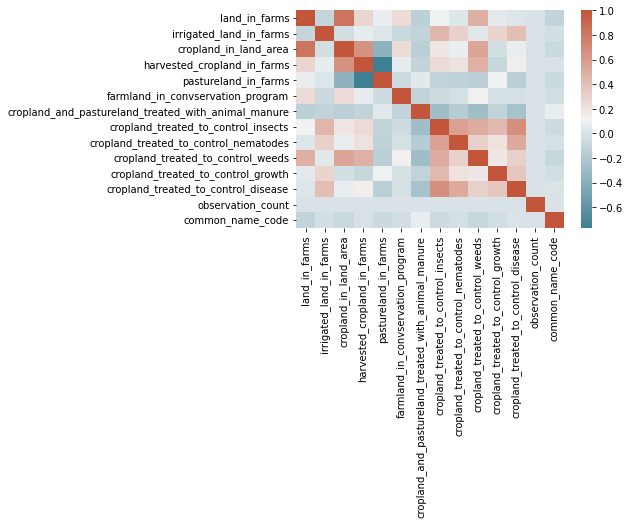

In [15]:
import seaborn as sns

corr = corr_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [16]:
unique_species = corr_df.common_name.unique()
species_subsets = []

for i in range(len(unique_species)):
    species_subsets.append(corr_df[corr_df['common_name'] == unique_species[i]])

<h3>4.1.2 Species-Dependent Correlation Matrices</h3>

<b>Results of Species-Dependent Correlation Matrices:</b> The below correlation matrices show that the individual species matrices exhibit slight correlations between fields in the NASS and observation count. Since seaborn has a limitation of one heat map correlation matrix per cell, a few select species dataframes will be shown to demonstrate the correlations of interest...
1. Northern Bobwhite observation count appears slightly positively correlated with 'land in farms' and 'pastureland in farms', and slightly negatively correlated with 'harvested cropland in farms', 'cropland and pastureland treated with animal manure',, and 'cropland treated to control nematodes'. 
2. Long-billed curlew observation count appears slightly positively correlated with 'irrigated land in farms' and slightly negatively correlated with 'pastureland in farms' and 'farmland enrolled in conservation programs'
3. Upland sandpiper observation count appears slightly positvely correlated with 'pastureland in farms'.
4. An interesting control: red-winged blackbird appears to have negligible correlation with all of the NASS fields. This species is observed ubiquitously in the US, so correlations would have been unexpected. 

While the relationship between observation count and the NASS fields are top of mind with respect to the analysis, it is possible that relationships between NASS fields could be of interest as well. There is a clear positive correlation between various fields related to treatment with chemicals to be further explored.

In [17]:
def corr_matrix(df, i):
    print('Correlation Matrix for species:', unique_species[i])
    corr = species_subsets[i].corr()# plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
        annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Correlation Matrix for species: Northern Bobwhite


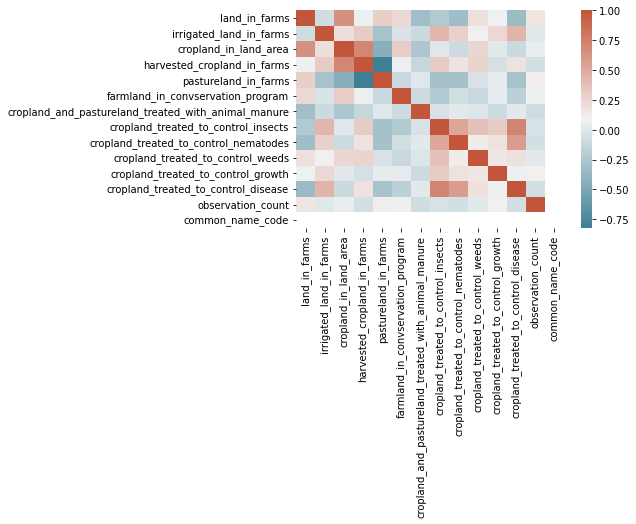

In [18]:
corr_matrix(corr_df, 0)

Correlation Matrix for species: Long-billed Curlew


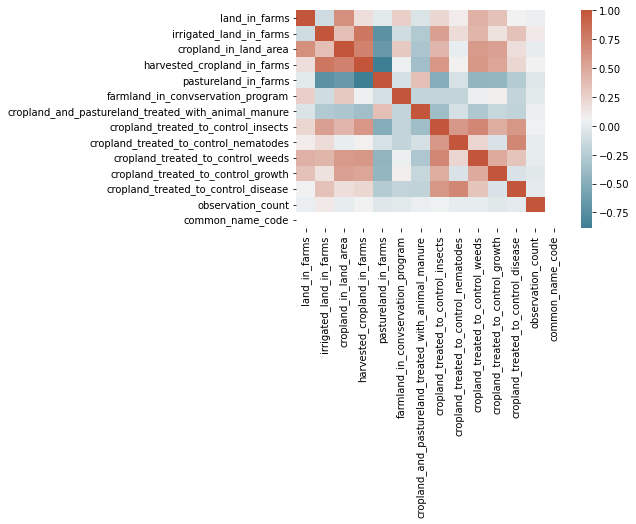

In [19]:
corr_matrix(corr_df, 13)

Correlation Matrix for species: Upland Sandpiper


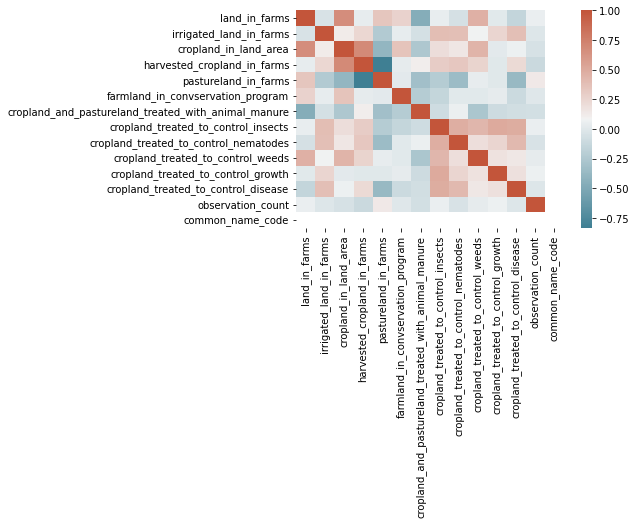

In [20]:
corr_matrix(corr_df, 9)

Correlation Matrix for species: Red-winged Blackbird


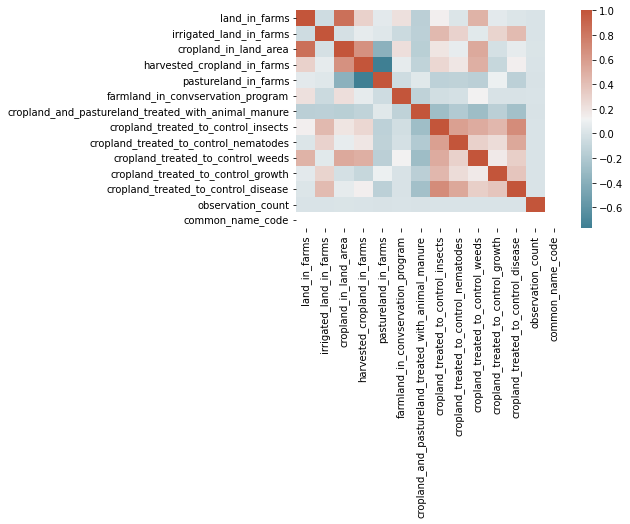

In [21]:
corr_matrix(corr_df, 5)

<h2> 4.2 Scatter Plot Construction </h2>

<h3> 4.2.1 Bird observation scatter plots: </h3>

The dataset is >3 million rows and is too hefty to reliably generate scatter plots from within jupyter notebook for all combinations of fields. To suffice for the holistic approach of generating a scatter matrix (for EDA purpose only), fields which exhibit relatively strong correlations from the above examples will be plotted for species-specific instances. The scatter plots below help to emphasize basic themes in the correlation matrix to explore during implementation.

Scatter plot for species: Northern Bobwhite
Scatter plot for species: Red-winged Blackbird
Scatter plot for species: Long-billed Curlew


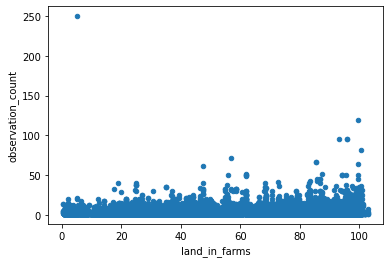

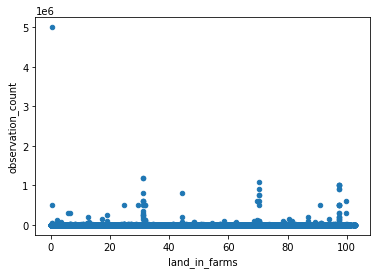

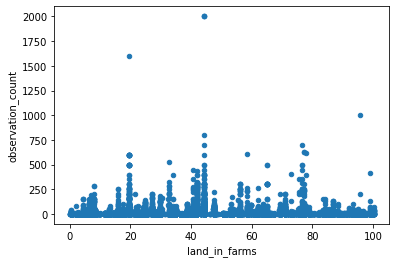

In [22]:
def scatter_plot(df, col1, col2):
    print('Scatter plot for species:', unique_species[i])
    df.plot(kind='scatter', x=col1, y=col2)

for i in [0, 5, 13]: # species dataframes from the list (northern bobwhite, long-billed curlew, red-winged blackbird)
    scatter_plot(species_subsets[i], 'land_in_farms', 'observation_count')

<h3>4.2.2 NASS Agricultural Scatter Plots: </h3>
To create histograms for the NASS data, the NASS dimension table will be used because a. it is significantly more computationally efficient and b. it is the normalized form of the data.

<b>Results: </b>
The relationships among this dataset will be explored in much more depth during project implementation. However, the pairplot visualization created using Seaborn creates a scatterplot matrix which brings some obvious relations to the forefront. By leveraging the heatmap created above, we can select correlated fields to hone in on in this matrix. A series of individual plots will be constructed following the scatterplot matrix to allow more visibility into the trends.

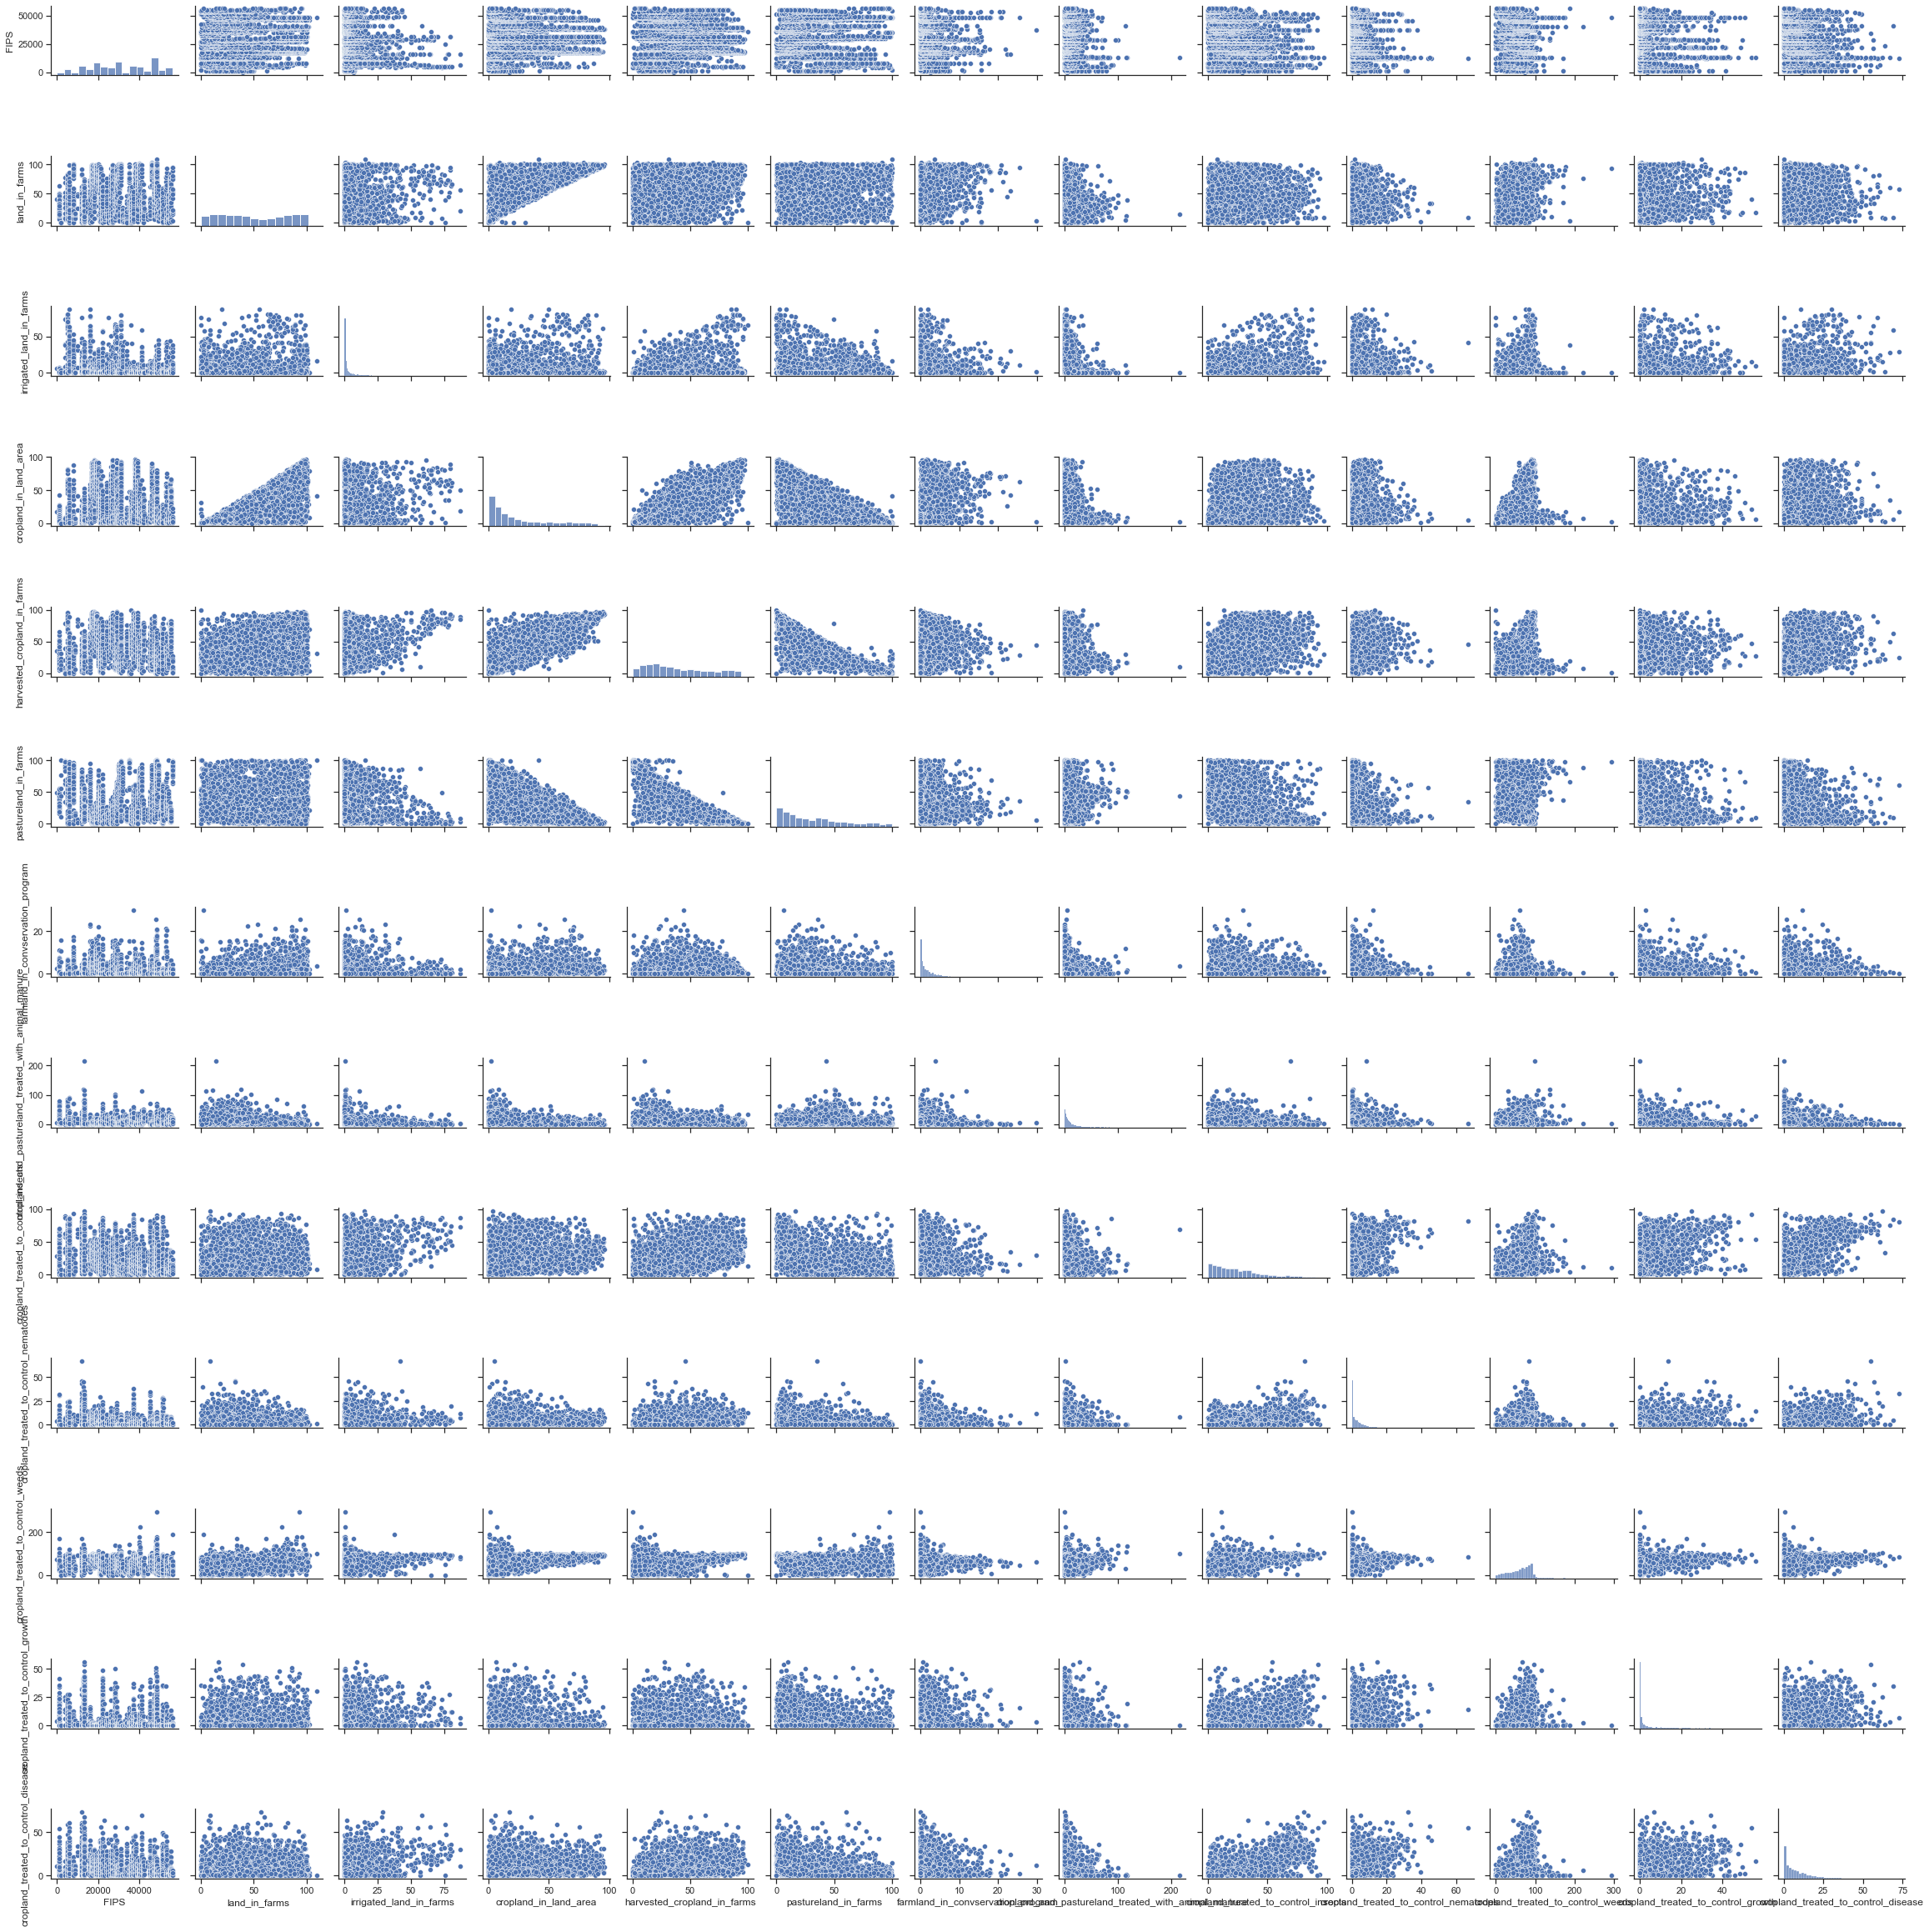

In [23]:
sns.set_theme(style="ticks")
sns.pairplot(cleaned_nass_df)

<h3>4.2.3 Select NASS Agricultural Scatter Plots from Pairplot </h3>

<AxesSubplot:xlabel='cropland_treated_to_control_insects', ylabel='cropland_treated_to_control_disease'>

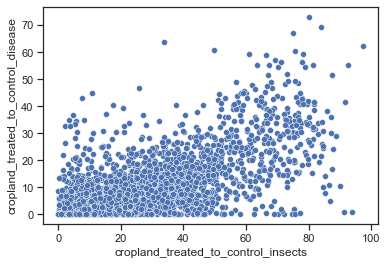

In [24]:
# a handful of interesting relationships to be explored in tandem with the bird observation dataset during implementation
sns.scatterplot(data=cleaned_nass_df, x='cropland_treated_to_control_insects', y='cropland_treated_to_control_disease')

<AxesSubplot:xlabel='farmland_in_convservation_program', ylabel='cropland_treated_to_control_nematodes'>

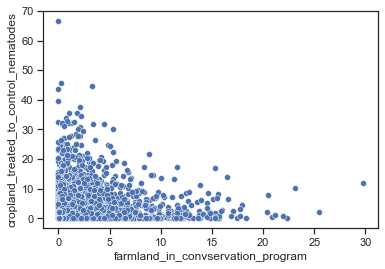

In [25]:
sns.scatterplot(data=cleaned_nass_df, x='farmland_in_convservation_program',
                y='cropland_treated_to_control_nematodes')

<AxesSubplot:xlabel='farmland_in_convservation_program', ylabel='cropland_and_pastureland_treated_with_animal_manure'>

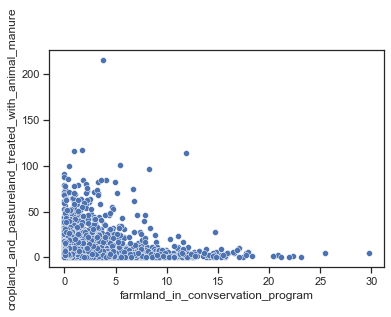

In [26]:
sns.scatterplot(data=cleaned_nass_df, x='farmland_in_convservation_program',
                y='cropland_and_pastureland_treated_with_animal_manure')

<AxesSubplot:xlabel='cropland_and_pastureland_treated_with_animal_manure', ylabel='cropland_treated_to_control_disease'>

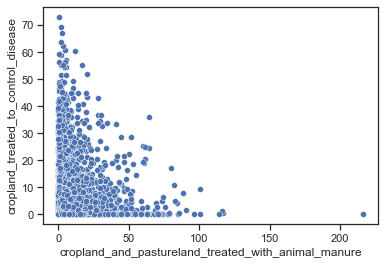

In [27]:
sns.scatterplot(data=cleaned_nass_df, x='cropland_and_pastureland_treated_with_animal_manure',
                y='cropland_treated_to_control_disease')

<AxesSubplot:xlabel='cropland_in_land_area', ylabel='cropland_treated_to_control_weeds'>

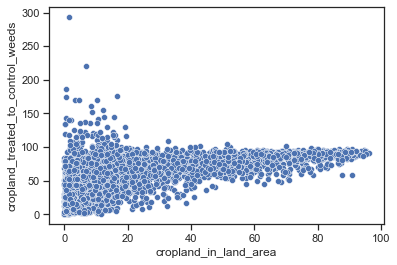

In [28]:
sns.scatterplot(data=cleaned_nass_df, x='cropland_in_land_area',
                y='cropland_treated_to_control_weeds')

<h2> 4.3 Histograms </h2>

Gathering insights into the distribution of various numeric fields in the merged dataframe.

<h3> 4.3.1 Bird observation histograms: </h3>
<b>Results:</b> Of the three selected species, the observation counts exhibit a steeply skewed negative distribution.

Species: Northern Bobwhite


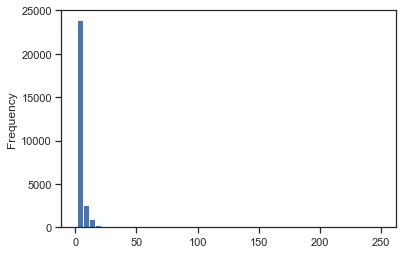

In [29]:
def hist(df, col):
    #rng = df[col].max() - df[col].min() # Sturge's rule to determine ideal number of histogram bins based on range
    #bin_count = int(np.ceil(rng) + 1)
    df[col].plot(kind='hist', bins=50)

# northern bobwhite
print('Species:', unique_species[0])
hist(species_subsets[0], 'observation_count')

Species: Long-billed Curlew


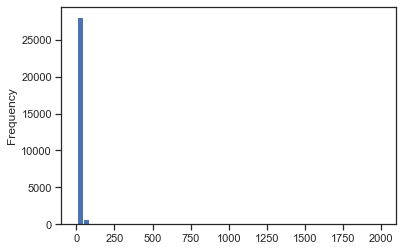

In [30]:
# long-billed curlew
print('Species:', unique_species[13])
hist(species_subsets[13], 'observation_count')

Species: Upland Sandpiper


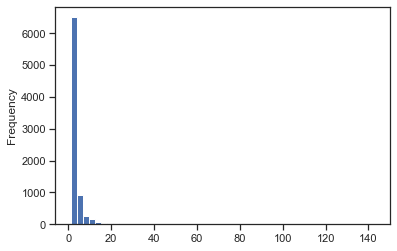

In [31]:
# upland sandpiper
print('Species:', unique_species[9])
hist(species_subsets[9], 'observation_count')

<h3> 4.3.2 NASS Agricultural Histograms</h3>

Index(['FIPS', 'land_in_farms', 'irrigated_land_in_farms',
       'cropland_in_land_area', 'harvested_cropland_in_farms',
       'pastureland_in_farms', 'farmland_in_convservation_program',
       'cropland_and_pastureland_treated_with_animal_manure',
       'cropland_treated_to_control_insects',
       'cropland_treated_to_control_nematodes',
       'cropland_treated_to_control_weeds',
       'cropland_treated_to_control_growth',
       'cropland_treated_to_control_disease'],
      dtype='object')


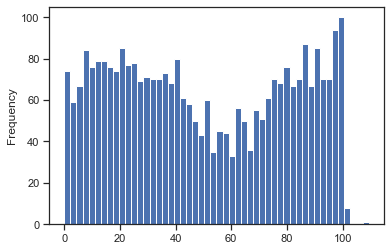

In [32]:
print(cleaned_nass_df.columns)
# land in farms as percentage of land area in acres
hist(cleaned_nass_df, 'land_in_farms')

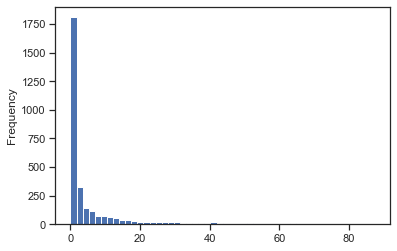

In [33]:
# acres of irrigated land as percent of land in farms
hist(cleaned_nass_df, 'irrigated_land_in_farms')

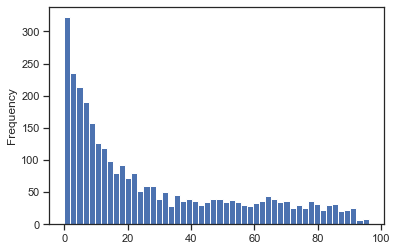

In [34]:
# acres of cropland as percent of land area
hist(cleaned_nass_df, 'cropland_in_land_area')

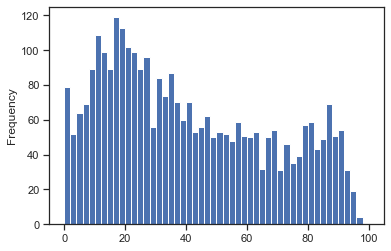

In [35]:
# Acres of Harvested Cropland as Percent of Land in Farms Acreage
hist(cleaned_nass_df, 'harvested_cropland_in_farms')

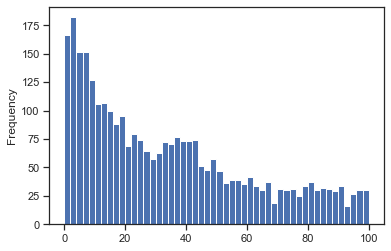

In [36]:
# Acres of All Types of Pastureland as Percent of Land in Farms Acreage
hist(cleaned_nass_df, 'pastureland_in_farms')

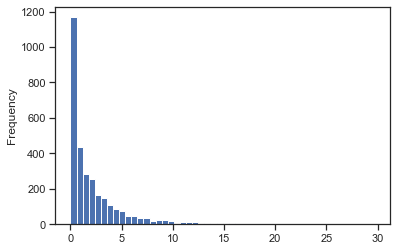

In [37]:
# Acres Enrolled in the Conservation Reserve, Wetlands Reserve, 
# Farmable Wetlands, or Conservation Reserve Enhancement Programs as Percent of Land in Farms Acreage:
hist(cleaned_nass_df, 'farmland_in_convservation_program')

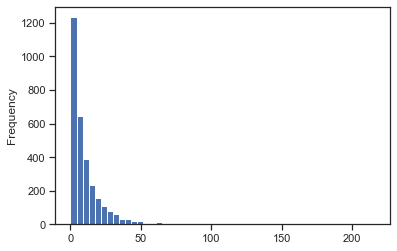

In [38]:
# Acres of Cropland and Pastureland Treated with Animal Manure as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_and_pastureland_treated_with_animal_manure')

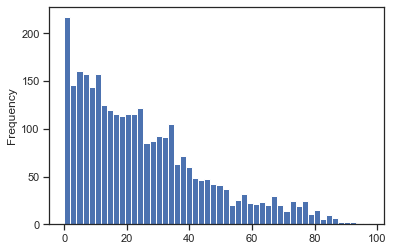

In [39]:
# Acres Treated with Chemicals to Control Insects as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_treated_to_control_insects')

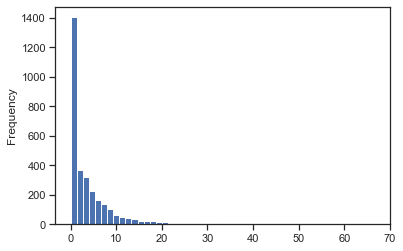

In [40]:
# Acres Treated with Chemicals to Control Nematodes as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_treated_to_control_nematodes')

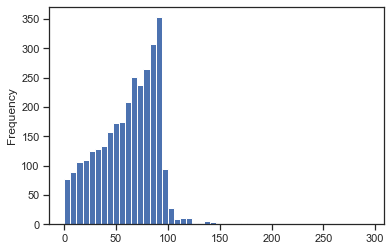

In [41]:
# Acres Treated with Chemicals to Control Weeds as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_treated_to_control_weeds')

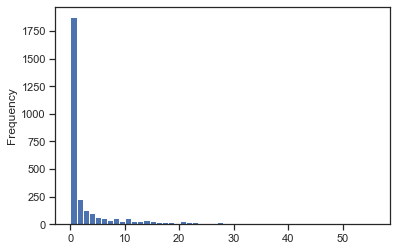

In [42]:
# Acres of Crops Treated with Chemicals to Control Growth, Thin Fruit, Ripen, or Defoliate as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_treated_to_control_growth')

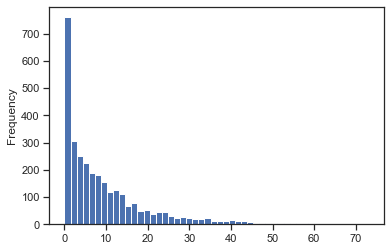

In [43]:
# Acres of Crops Treated with Chemicals to Control Disease as Percent of Total Cropland Acreage
hist(cleaned_nass_df, 'cropland_treated_to_control_disease')

<h1> 5. Synopsis of Analysis, Limitations, and Next Steps</h1>

Circling back on some of the core questions asked during the introduction of this report:

- Are certain species observed more frequently in regions with dense areas of pastureland, cropland, or irrigated land?
- What are the population densities of grassland-dependent bird species in regions with higher usage of chemicals to control insects, growth, or disease?
- Do regions with more acres enrolled in conservation efforts have more dense populations of grassland-dependent species?
- Are there species of grassland-dependent bird which tend to associate more heavily with farmland treated with animal manure?

Based on the preliminary analyses and exploration of the dataset described in this report, the questions above are feasible to address with the given data, with some obvious limitations which will be addressed in section 5.2.

<h2> 5.1 Context for Further Analysis </h2>

The nature of the questions to be addressed in downstream analysis can be broken into a few discrete sub-domains:
1. Can we predict geographic regions with large populations of a given species based on the agricultural census fields related to agricultural ecosystems (e.g., percentage of acres with pastureland, cropland, farmland)? This question can be broken down further by species.
2. Is there any association between agricultural practices (e.g., treatment of land with animal manure, chemicals to control insects, disease, etc.) and grassland-dependent bird species observations? Without making assumptions, it would be interesting to explore whether certain species tend to exist in areas where more land is treated with animal manure or chemicals. The reason for chemical treatment (disease, insects, growth, nematodes) could also be an interesting trend to investigate in combination with species observation data.
3. Can we determine whether enrollment in conservation efforts or conservation reserve enhancement programs has the potential to improve grassland-dependent bird observation counts and population?

<h2> 5.2 Limitations </h2>

There are a few obvious limitations of the data which should be explicitly stated:
1. There is no temporal component to the data. The study is limited in scope to the year 2017, so the change in populations and agricultural practices over time is not possible to investigate. Additionally, dates are not associated with the observation data. Thus, patterns in species migration and breeding populations cannot be extrapolated from the data. For example, species may migrate through a state in the spring and fall, only passing through temporarily, while other species may migrate into a region in the spring, breed there through the summer, and migrate south in the fall. This type of population analysis is not feasible with the given dataset, thus only total species count over the year 2017 are observable. Further efforts to enrich the dataset could be undertaken in the future following project implementation.
2. The dataset is limited to a small subset of grassland-dependent bird species and is by no means comprehensive. I selected the 16 species in this dataset based on an Audubon grassland birds report. There are dozens of other species which are also dependent on this habitat for survival, including Short-Eared Owl, Northern Harriers, Sandhill Crane, Sedge Wren, and many others. This limits the type of analysis that can be performed on the data, such as population diversity analysis. Including every species in the initial dataset construction would have been incredibly computationally expensive, and the dataset would ultimately contain hundreds of millions or billions of rows. Combine this with expanding the dataset to include multiple years worth of data, and the size of the dataset could easily become unmanageable. Hence, the decision was made early on in the dataset engineering phase that the scope should be limited temporally and with respect to the number of species included.
3. The dataset does not contain the full set of features made available from the NASS agricultural census. Along the same vein as the second limitation, including the full breadth of fields from the agricultural census would have added significant size to the dataset. Fields were selected based on subject matter knowledge and relevance to the anticipated downstream applications.

<h2> 5.3 Implementation Plan </h2>

A series of algorithms learned in DSCI521 will be used to drill down into the questions proclaimed in section 5 & 5.1. Relationships identified during the correlation matrix contruction and scatterplot analysis will be leveraged to inform analytical methodologies used in project implementation. 

Once implemented, the analysis will be disseminated virtually in the form of either a written report and code will be made available on GitHub. It will also be practical to construct a visualization of the dataset for end-user consumption.